In [57]:
import pandas as pd
import numpy as np
import os, json
import nltk
import importlib

In [58]:
DATAPATH = 'data'
CSV_FILEPATH ="/".join([DATAPATH, 'metadata_ft_subset.csv'])

In [59]:
df = pd.read_csv(CSV_FILEPATH)
print(df.shape)
df.head()

(33499, 19)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url,full_body_text
0,xqhn0vbp,1e1286db212100993d03cc22374b624f7caee956,PMC,Airborne rhinovirus detection and effect of ul...,10.1186/1471-2458-3-5,PMC140314,12525263.0,no-cc,"BACKGROUND: Rhinovirus, the most common cause ...",2003-01-13,"Myatt, Theodore A; Johnston, Sebastian L; Rudn...",BMC Public Health,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,Rhinoviruses have been associated with 40% to ...
1,gi6uaa83,8ae137c8da1607b3a8e4c946c07ca8bda67f88ac,PMC,Discovering human history from stomach bacteria,10.1186/gb-2003-4-5-213,PMC156578,12734001.0,no-cc,Recent analyses of human pathogens have reveal...,2003-04-28,"Disotell, Todd R",Genome Biol,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...,Charles Darwin recognized that the distributio...
3,fy4w7xz8,0104f6ceccf92ae8567a0102f89cbb976969a774,PMC,Association of HLA class I with severe acute r...,10.1186/1471-2350-4-9,PMC212558,12969506.0,no-cc,BACKGROUND: The human leukocyte antigen (HLA) ...,2003-09-12,"Lin, Marie; Tseng, Hsiang-Kuang; Trejaut, Jean...",BMC Med Genet,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,patient group a further significant increase ...
4,0qaoam29,5b68a553a7cbbea13472721cd1ad617d42b40c26,PMC,A double epidemic model for the SARS propagation,10.1186/1471-2334-3-19,PMC222908,12964944.0,no-cc,BACKGROUND: An epidemic of a Severe Acute Resp...,2003-09-10,"Ng, Tuen Wai; Turinici, Gabriel; Danchin, Antoine",BMC Infect Dis,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,Since November 2002 (and perhaps earlier) an o...
5,qj4dh6rg,3ed670f60a7be2e3e2a991ea8af1fdd5fa5e2b2c,PMC,Cloaked similarity between HIV-1 and SARS-CoV ...,10.1186/1471-2180-3-20,PMC222911,14499001.0,no-cc,BACKGROUND: Severe acute respiratory syndrome ...,2003-09-21,"Kliger, Yossef; Levanon, Erez Y",BMC Microbiol,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...,Infection by many enveloped viruses requires f...


In [82]:
import process_tools
importlib.reload(process_tools)

<module 'process_tools' from 'C:\\Users\\Khachatur\\ML-COVID-CORD\\process_tools.py'>

In [61]:
docs = process_tools.extract_simple_docs(df)
len(docs)

33499

In [62]:
stop_words = process_tools.get_stopwords()

In [63]:
len(stop_words)

619

In [85]:
models_df = pd.DataFrame(columns=['model_name', 'model_type', 'num_topics', 'abs_or_full', 'top_n_grams', 'hyperparam_dict', 'avg_topic_coherence', 'rstd_atc'])

In [65]:
docs = process_tools.simple_preprocess(docs)
len(docs)

33499

In [66]:
from gensim.corpora import Dictionary

# Create a dictionary representation of the documents.
dictionary = Dictionary(docs)

# Filter out words that occur less than 20 documents, or more than 50% of the documents.
dictionary.filter_extremes(no_below=20, no_above=0.5)
corpus = [dictionary.doc2bow(doc) for doc in docs]
print('Number of unique tokens: %d' % len(dictionary))
print('Number of documents: %d' % len(corpus))

Number of unique tokens: 10896
Number of documents: 33499


In [67]:
lda_model = process_tools.make_lda(dictionary, corpus, 100)
avg_topic_coherence, rstd_atc = process_tools.get_model_stats(lda_model, docs, dictionary, 100, verbose=True)

Average topic coherence:  0.5129402468710557
Relative Standard Deviation of ATC:  0.25703636843256844


In [68]:
list(models_df.columns)

['model_name',
 'model_type',
 'num_topics',
 'abs_or_full',
 'top_n_grams',
 'hyperparam_dict',
 'avg_topic_coherence',
 'rstd_atc']

In [69]:
process_tools.get_current_timestamp()

'2020-04-21 18:41:08'

In [72]:
# num_topics = 100
# model_type = 'lda'
# abs_or_full = 'abs'
# avg_topic_coherence
# top_n_grams = 1
# hyperparam_dict = None
# rstd_atc = rstd_atc

# model_name = model_type + "_" + str(num_topics) + "_" + process_tools.get_current_timestamp()
# models_df = models_df.append({'model_name':model_name, 'num_topics':num_topics, 'model_type':model_type, 'abs_or_full':abs_or_full,
#                       'top_n_grams':top_n_grams, 'hyperparam_dict': hyperparam_dict, 
#                       'avg_topic_coherence':avg_topic_coherence, 'rstd_atc':rstd_atc}, ignore_index=True)

In [81]:
models_df

,model_name,model_type,num_topics,abs_or_full,top_n_grams,hyperparam_dict,avg_topic_coherence,rstd_atc
0,lda_100_2020-04-21 18:41:08,lda,NaN,abs,1,None,0.51294,0.257036
1,lda_100_2020-04-21 18:44:14,lda,100.0,abs,1,None,0.51294,0.257036


In [83]:
models_df = process_tools.add_model_row(models_df, model_type, num_topics, abs_or_full, top_n_grams, hyperparam_dict, avg_topic_coherence, rstd_atc)
models_df

,model_name,model_type,num_topics,abs_or_full,top_n_grams,hyperparam_dict,avg_topic_coherence,rstd_atc
0,lda_100_2020-04-21 18:41:08,lda,NaN,abs,1,None,0.51294,0.257036
1,lda_100_2020-04-21 18:44:14,lda,100.0,abs,1,None,0.51294,0.257036
2,lda_100_2020-04-21 18:49:27,lda,100.0,abs,1,None,0.51294,0.257036


In [84]:
NUM_TOPICS_LIST = [5, 10, 20, 30, 50, 75, 100, 150, 200, 250, 300, 400]

In [87]:
model_type = 'lda'
abs_or_full = 'abs'
top_n_grams = 1
hyperparam_dict = None

for num_topics in NUM_TOPICS_LIST:
    lda_model = process_tools.make_lda(dictionary, corpus, num_topics)
    avg_topic_coherence, rstd_atc = process_tools.get_model_stats(lda_model, docs, dictionary, num_topics, verbose=True)
    models_df = process_tools.add_model_row(models_df, model_type, num_topics, abs_or_full, top_n_grams, hyperparam_dict, avg_topic_coherence, rstd_atc)

Average topic coherence:  0.5109752993674965
Relative Standard Deviation of ATC:  0.14939159866450386
Average topic coherence:  0.5396251260862281
Relative Standard Deviation of ATC:  0.08175588495587423
Average topic coherence:  0.5457638871636933
Relative Standard Deviation of ATC:  0.19777863486411232
Average topic coherence:  0.5409271219139696
Relative Standard Deviation of ATC:  0.19673017625328787
Average topic coherence:  0.5388406945546168
Relative Standard Deviation of ATC:  0.2227118157958553
Average topic coherence:  0.5218854388847295
Relative Standard Deviation of ATC:  0.2605068852036861
Average topic coherence:  0.499072191537296
Relative Standard Deviation of ATC:  0.2962086316263285
Average topic coherence:  0.506137839743808
Relative Standard Deviation of ATC:  0.274159787219385
Average topic coherence:  0.4815115566653587
Relative Standard Deviation of ATC:  0.29920472940764853
Average topic coherence:  0.4757073333704673
Relative Standard Deviation of ATC:  0.29521

In [88]:
models_df

,model_name,model_type,num_topics,abs_or_full,top_n_grams,hyperparam_dict,avg_topic_coherence,rstd_atc
0,lda_5_2020-04-21 18:55:07,lda,5,abs,1,None,0.025006,2.239401
1,lda_5_2020-04-21 18:58:29,lda,5,abs,1,None,0.510975,0.149392
2,lda_10_2020-04-21 19:00:26,lda,10,abs,1,None,0.539625,0.081756
3,lda_20_2020-04-21 19:02:32,lda,20,abs,1,None,0.545764,0.197779
4,lda_30_2020-04-21 19:04:43,lda,30,abs,1,None,0.540927,0.196730
5,lda_50_2020-04-21 19:07:21,lda,50,abs,1,None,0.538841,0.222712
6,lda_75_2020-04-21 19:13:32,lda,75,abs,1,None,0.521885,0.260507
7,lda_100_2020-04-21 19:20:42,lda,100,abs,1,None,0.499072,0.296209
8,lda_150_2020-04-21 19:30:07,lda,150,abs,1,None,0.506138,0.274160
9,lda_200_2020-04-21 19:40:38,lda,200,abs,1,None,0.481512,0.299205


In [89]:
import matplotlib.pyplot as plt

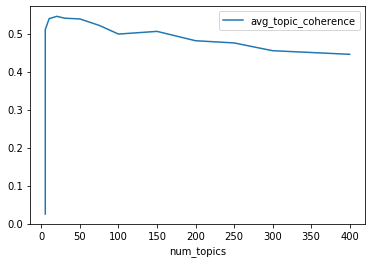

In [92]:
models_df.plot(x ='num_topics', y='avg_topic_coherence', kind = 'line')

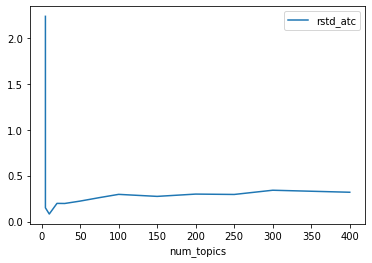

In [93]:
models_df.plot(x ='num_topics', y='rstd_atc', kind = 'line')